# **Customer churn with Logistic Regression**

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

Lets first import required libraries:

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing

import matplotlib.pyplot as plt

**Load the Telco Churn data**

Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. 

Each case corresponds to a separate customer and it records various demographic and service usage information. 


In [2]:
churn_df = pd.read_csv("./DataSets/ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
churn_df.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [4]:
churn_df.info

<bound method DataFrame.info of      tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0      11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1      33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2      23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3      38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4       7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   
5      68.0  52.0     17.0   120.0  1.0    24.0    0.0       1.0       0.0   
6      42.0  40.0      7.0    37.0  2.0     8.0    1.0       1.0       1.0   
7       9.0  21.0      1.0    17.0  2.0     2.0    0.0       0.0       0.0   
8      35.0  50.0     26.0   140.0  2.0    21.0    0.0       1.0       0.0   
9      49.0  51.0     27.0    63.0  4.0    19.0    0.0       1.0       0.0   
10     56.0  52.0     28.0    49.0  2.0    12.0    0.0       1.0       0.0   
11     47.0  40.0     16.0   127

In [5]:
churn_df.shape

(200, 28)

**Data pre-processing and selection**

Lets select some features for the modeling. Also we change the target data type to be integer.

In [6]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

/home/fenris/.condahome/envs/Uni/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,0


Selecting X and Y from the dataset

In [7]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
print(X[0:5])
y = np.asarray(churn_df['churn'])
print(y [0:5])

[[ 11.  33.   7. 136.   5.   5.   0.]
 [ 33.  33.  12.  33.   2.   0.   0.]
 [ 23.  30.   9.  30.   1.   2.   0.]
 [ 38.  35.   5.  76.   2.  10.   1.]
 [  7.  35.  14.  80.   2.  15.   0.]]
[1 1 0 0 0]


In [8]:
print(y [0:100])

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0]


***Normalizing the dataset*****

In [9]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

Training and Testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [11]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

This function implements logistic regression and can use different numerical optimizers to find parameters, including **‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers**. There are pros and cons of these optimizers. 

The version of Logistic Regression in Scikit-learn, support regularization. 

Regularization is a technique used to solve the overfitting problem in machine learning models. 

C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization.


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)
LR

/home/fenris/.condahome/envs/Uni/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/fenris/.condahome/envs/Uni/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.f

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Testing**

In [13]:
yhat = LR.predict(X_test)
yhat

/home/fenris/.condahome/envs/Uni/lib/python3.7/site-packages/sklearn/linear_model/base.py:326: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [14]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.5055063 , 0.4944937 ],
       [0.51347317, 0.48652683],
       [0.50602462, 0.49397538],
       [0.52000045, 0.47999955],
       [0.50661998, 0.49338002],
       [0.50673336, 0.49326664],
       [0.49839547, 0.50160453],
       [0.51405871, 0.48594129],
       [0.48122787, 0.51877213],
       [0.51944971, 0.48055029],
       [0.51298723, 0.48701277],
       [0.52293885, 0.47706115],
       [0.48984113, 0.51015887],
       [0.48407622, 0.51592378],
       [0.52861954, 0.47138046],
       [0.5092273 , 0.4907727 ],
       [0.50191901, 0.49808099],
       [0.49233906, 0.50766094],
       [0.49487978, 0.50512022],
       [0.49864676, 0.50135324],
       [0.51699424, 0.48300576],
       [0.50364772, 0.49635228],
       [0.51953823, 0.48046177],
       [0.50404011, 0.49595989],
       [0.49833478, 0.50166522],
       [0.5372498 , 0.4627502 ],
       [0.51029376, 0.48970624],
       [0.50165227, 0.49834773],
       [0.49767905, 0.50232095],
       [0.53805393, 0.46194607],
       [0.

In [15]:
yhat_prob.shape


(40, 2)

**Confussion matrix**

Another way of looking at accuracy of classifier is to look at confusion matrix.

[[ 9  6]
 [ 5 20]]
Confusion matrix, without normalization
[[ 9  6]
 [ 5 20]]


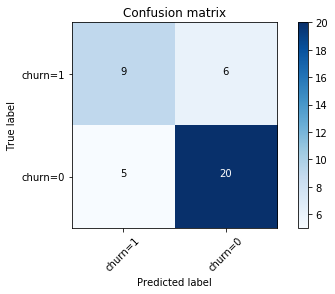

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [17]:
print (classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.77      0.80      0.78        25
          1       0.64      0.60      0.62        15

avg / total       0.72      0.72      0.72        40

